In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X=np.linspace(1,10,10)
X

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [3]:
y=np.arange(1,10,2)
y

array([1, 3, 5, 7, 9])

In [4]:
np.random.randint(1,10)

3

## Linear Regression From Scratch

In [15]:
# Generating random data points
np.random.seed(100)
X=[random.randint(1,11) for i in range(10)]
y=[random.randint(4,9) for i in range(10)]

In [16]:
X = sorted(X)

In [18]:
y

[7, 7, 4, 4, 5, 4, 9, 5, 8, 6]

In [19]:
df = pd.DataFrame(columns=['X','y'])
df['X']=X
df['y']=y

Text(0, 0.5, 'y')

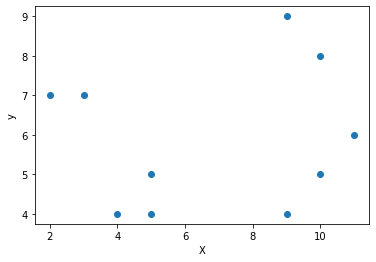

In [20]:
plt.scatter(df.X,df.y)
plt.xlabel('X')
plt.ylabel('y')

In [21]:
df.head()

,X,y
0,2,7
1,3,7
2,4,4
3,5,4
4,5,5


In [22]:
y_sum=df['y'].sum()
y_sum

59

In [23]:
x_sq_sum=(df['X']**2).sum()
x_sq_sum

562

In [24]:
xy=(df['X']*df['y']).sum()
xy

409

In [25]:
x_sum=df['X'].sum()
x_sum

68

In [27]:
# x sum squared
x_sum_sq=(df['X'].sum())**2
x_sum

68

# Finding The Values Of m And c

In [28]:
# finding slope m
m =(((y_sum*x_sq_sum)-(x_sum*xy))/((x_sq_sum)-(x_sum_sq)))
m

-1.3161004431314622

In [29]:
n = len(df)
n

10

In [30]:
# finding bias b
b = (((n*xy)-(x_sum*y_sum))/((n*x_sq_sum)-(x_sum_sq)))
b

0.0783132530120482

## Fit function

In [31]:
# func
def fit(X,y):
    y_sum=df['y'].sum()
    x_sq_sum=(df['X']**2).sum()
    xy=(df['X']*df['y']).sum()
    x_sum=df['X'].sum()
    x_sum_sq=(df['X'].sum())**2
    m = (((y_sum*x_sq_sum)-(x_sum*xy))/((x_sq_sum)-(x_sum_sq)))
    b = (((n*xy)-(x_sum*y_sum))/((n*x_sq_sum)-(x_sum_sq)))
    return (m,b)

## Prediction

In [32]:
pred = m*df['X']+b
pred

0    -2.553888
1    -3.869988
2    -5.186089
3    -6.502189
4    -6.502189
5   -11.766591
6   -11.766591
7   -13.082691
8   -13.082691
9   -14.398792
Name: X, dtype: float64

In [33]:
df['y_hat']=pred

In [46]:
df.head()

,X,y,y_hat
0,1,7,-3.697917
1,1,7,-3.697917
2,1,7,-3.697917
3,3,8,-10.989583
4,6,6,-21.927083


In [34]:
# FINDING MSE
MSE = ((1/n)*(((df['y_hat']-df['y'])**2).sum()))
MSE

240.38249172740325

## Separating training and testing

In [35]:
X_train = df['X'].iloc[0:8]
X_train

0     2
1     3
2     4
3     5
4     5
5     9
6     9
7    10
Name: X, dtype: int64

In [36]:
y_train = df['y'].iloc[0:8]
y_train

0    7
1    7
2    4
3    4
4    5
5    4
6    9
7    5
Name: y, dtype: int64

In [37]:
X_test = df['X'].iloc[8:]
X_test

8    10
9    11
Name: X, dtype: int64

In [38]:
y_test = df['y'].iloc[8:]
y_test

8    8
9    6
Name: y, dtype: int64

## Fitting/training on training data

In [39]:
m_train,b_train = fit(X_train,y_train)

In [40]:
m_train,b_train

(-1.3161004431314622, 0.0783132530120482)

In [41]:
df_train = pd.DataFrame(columns=['X','y'])
df_train['X']=X_train
df_train['y']=y_train

In [42]:
df_train['y_hat'] = m*df['X']+b
df_train['y_hat']

0    -2.553888
1    -3.869988
2    -5.186089
3    -6.502189
4    -6.502189
5   -11.766591
6   -11.766591
7   -13.082691
Name: y_hat, dtype: float64

## Finding MSE for training data

In [41]:
# FINDING MSE
MSE_train = ((1/n)*(((df_train['y_hat']-df_train['y'])**2).sum()))
MSE_train

534.3371777221888

## Fitting/training on training data

In [42]:
m_test,b_test = fit(X_test,y_test)

In [43]:
m_test,b_test

(-3.5752005347593583, -0.15117104329311568)

In [44]:
df_test = pd.DataFrame(columns=['X','y'])
df_test['X']=X_test
df_test['y']=y_test

In [45]:
df_test['y_hat'] = m*df['X']+b
df_test['y_hat']

8   -39.478377
9   -39.478377
Name: y_hat, dtype: float64

## MSE for testing data

In [46]:
# FINDING MSE
MSE_train = ((1/n)*(((df_test['y_hat']-df_test['y'])**2).sum()))
MSE_train

413.85655355822723

## Plotting Graph For Visualization

In [160]:
# import matplotlib.pyplot as plt
# import numpy as np

# xpoints = np.array(X)
# ypoints = np.array(y)
# y_hat = np.array(df['y_hat'])
# plt.plot(xpoints, ypoints)
# plt.show()

Text(0, 0.5, 'Predicted Line')

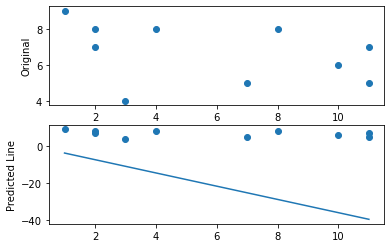

In [47]:
# plot of original data values
xpoints = np.array(X)
ypoints = np.array(y)

plt.subplot(2, 1, 1)
# plt.plot(xpoints,ypoints)
plt.scatter(xpoints,ypoints)
plt.ylabel('Original')

x1 = np.array(X)
y1 = np.array(df['y_hat'])

plt.subplot(2, 1, 2)
plt.scatter(xpoints,ypoints)
plt.plot(x1,y1)
plt.ylabel('Predicted Line')


## Gradient Descent

In [211]:
def update_weights(X,y,W,b,learning_rate):
    Y_pred = df['X']*W+b
    m=len(X)
          
        # calculate gradients  
      
    dW = - ( 2 * ( df['X'] ).dot( y - Y_pred )  ) / m
       
    db = - 2 * np.sum( y - Y_pred ) / m 
          
        # update weights
      
    W = W - learning_rate * dW
      
    b = b - learning_rate * db
    return (W,b)

In [212]:
def fit2(X,y,m,b):
    iterations=100
    for i in range( iterations ) :
        W,b = update_weights(X,y,m,b,0.01)
    return W,b

In [199]:
update_weights(X,y,m,b,0.01)

(0.615624594334649, 0.5254810709498619)

In [215]:
m,b = fit2(X,y,m,b)
m,b

(-1.355234075675116, 15.110201899341812)

In [216]:
df['y_hat2']=df['X']*m+b

In [217]:
# FINDING MSE
MSE = ((1/n)*(((df['y_hat2']-df['y'])**2).sum()))
MSE

13.892379545867222